In [1]:
import pandas as pd
import numpy as np

/Users/costefan/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/matplotlib/__init__.py:1120: UserWarning: Bad val "TkAggX" on line #1
	"backend: TkAggX
"
	in file "/Users/costefan/.matplotlib/matplotlibrc"
	Key backend: Unrecognized backend string "tkaggx": valid strings are ['GTK', 'GTKAgg', 'GTKCairo', 'MacOSX', 'Qt4Agg', 'Qt5Agg', 'TkAgg', 'WX', 'WXAgg', 'GTK3Cairo', 'GTK3Agg', 'WebAgg', 'nbAgg', 'agg', 'cairo', 'gdk', 'pdf', 'pgf', 'ps', 'svg', 'template']
  (val, error_details, msg))


In [2]:
%ls

HW2.ipynb                        UCU-Statistics-Slides-6.pdf.pdf
OverfittingTask.ipynb            peer_reviewers_assignment.ipynb
UCU-Statistics-Assignment-2.pdf  student/


In [3]:
df_math = pd.read_csv('student/student-mat.csv', sep=';')

In [4]:
df_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [5]:
df_math = df_math.drop(['G1', 'G2'], axis=1)
df_math = df_math.dropna()

## 1)

### Analysis to select variables

In [6]:
import matplotlib.pyplot as plt

In [7]:
%matplotlib inline

(array([ 38.,   0.,   0.,   0.,   1.,   7.,  15.,   9.,  32.,  28.,  56.,
         47.,  31.,  31.,  27.,  33.,  16.,   6.,  12.,   6.]),
 array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.]),
 <a list of 20 Patch objects>)

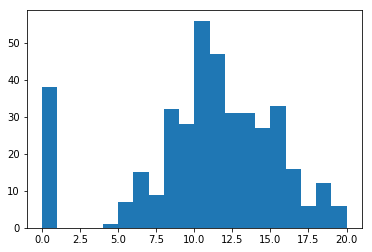

In [8]:
plt.hist(df_math['G3'], bins=20, label='G3 distribution')

In [9]:
import seaborn as sns

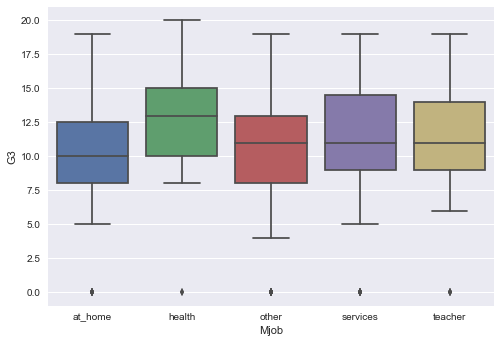

In [10]:
sns.boxplot(x='Mjob', y='G3', data=df_math)

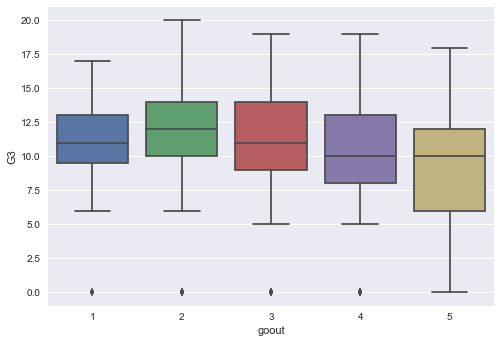

In [11]:
sns.boxplot(x='goout', y='G3', data=df_math)

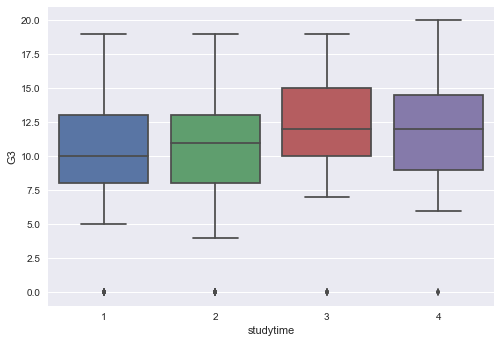

In [12]:
sns.boxplot(x='studytime', y='G3', data=df_math)

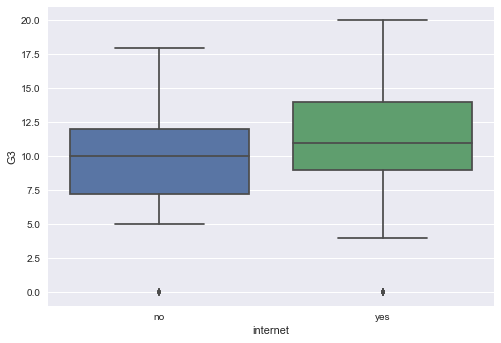

In [13]:
sns.boxplot(x='internet', y='G3', data=df_math)

In [14]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [15]:
pd.get_dummies(df_math, columns=['Mjob', 'goout'], prefix=['mothers_job', 'go_out']).head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Fjob,reason,...,mothers_job_at_home,mothers_job_health,mothers_job_other,mothers_job_services,mothers_job_teacher,go_out_1,go_out_2,go_out_3,go_out_4,go_out_5
0,GP,F,18,U,GT3,A,4,4,teacher,course,...,1,0,0,0,0,0,0,0,1,0
1,GP,F,17,U,GT3,T,1,1,other,course,...,1,0,0,0,0,0,0,1,0,0
2,GP,F,15,U,LE3,T,1,1,other,other,...,1,0,0,0,0,0,1,0,0,0
3,GP,F,15,U,GT3,T,4,2,services,home,...,0,1,0,0,0,0,1,0,0,0
4,GP,F,16,U,GT3,T,3,3,other,home,...,0,0,1,0,0,0,1,0,0,0


## Label encoder default

In [16]:
le = LabelEncoder()

In [17]:
le.fit(df_math['Mjob'])

LabelEncoder()

In [18]:
le.classes_

array(['at_home', 'health', 'other', 'services', 'teacher'], dtype=object)

In [19]:
transformed_le_mjob = le.transform(df_math['Mjob'])

In [20]:
transformed_df_le = df_math.copy()

In [21]:
transformed_df_le['Mjob'] = transformed_le_mjob

In [22]:
transformed_df_le.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,GP,F,18,U,GT3,A,4,4,0,teacher,...,no,no,4,3,4,1,1,3,6,6
1,GP,F,17,U,GT3,T,1,1,0,other,...,yes,no,5,3,3,1,1,3,4,6
2,GP,F,15,U,LE3,T,1,1,0,other,...,yes,no,4,3,2,2,3,3,10,10
3,GP,F,15,U,GT3,T,4,2,1,services,...,yes,yes,3,2,2,1,1,5,2,15
4,GP,F,16,U,GT3,T,3,3,2,other,...,no,no,4,3,2,1,2,5,4,10


## One hot encoder

In [23]:
oe = OneHotEncoder()

In [24]:
transformed_df_oe = df_math.copy()

In [25]:
transformed_dummies = pd.get_dummies(df_math, columns=['Mjob', 'goout'], prefix=['mothers_job', 'go_out']).head()

In [26]:
transformed_df_oe = pd.concat([transformed_df_oe, transformed_dummies], axis=1)

In [27]:
transformed_df_oe = transformed_df_oe.drop(['Mjob', 'goout'], axis=1)

In [28]:
transformed_df_oe.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Fjob,reason,...,mothers_job_at_home,mothers_job_health,mothers_job_other,mothers_job_services,mothers_job_teacher,go_out_1,go_out_2,go_out_3,go_out_4,go_out_5
0,GP,F,18,U,GT3,A,4,4,teacher,course,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,GP,F,17,U,GT3,T,1,1,other,course,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,GP,F,15,U,LE3,T,1,1,other,other,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,GP,F,15,U,GT3,T,4,2,services,home,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,GP,F,16,U,GT3,T,3,3,other,home,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


goout - ordered data, 
Mjob - categorical <br /> So, In my opinion, we should get mother's job with as dummy ds, and goout as label, but the suggestion in stackoverflow is to get all as dummy var's

Box Plots was created at start of the notebook

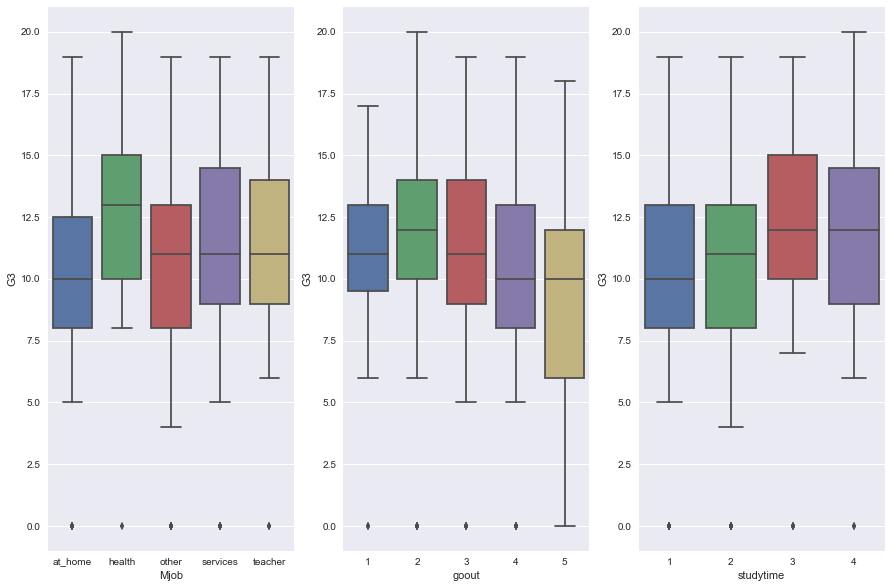

In [29]:
fig, axs = plt.subplots(ncols=3, figsize=(15, 10))
sns.boxplot(x='Mjob', y='G3', data=df_math, ax=axs[0])
sns.boxplot(x='goout', y='G3', data=df_math, ax=axs[1])
sns.boxplot(x='studytime', y='G3', data=df_math, ax=axs[2])

Mjob Plot

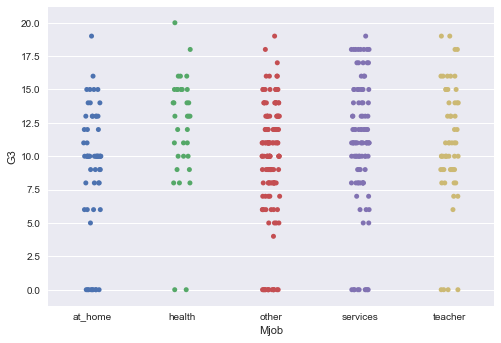

In [30]:
sns.stripplot(x='Mjob', y='G3', data=df_math, jitter=True)

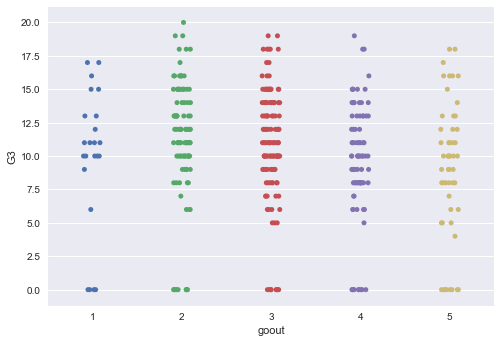

In [31]:
sns.stripplot(x='goout', y='G3', data=df_math, jitter=True)

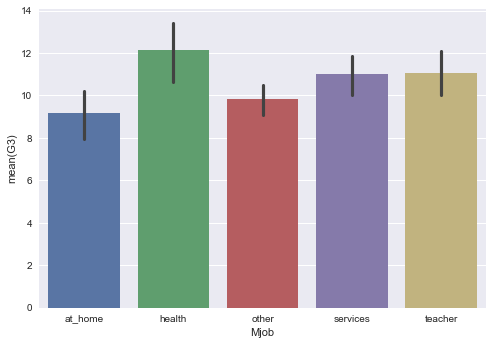

In [32]:
sns.barplot(x='Mjob', y='G3', data=df_math)

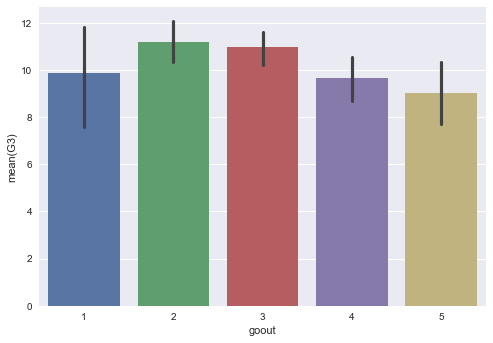

In [33]:
sns.barplot(x='goout', y='G3', data=df_math)

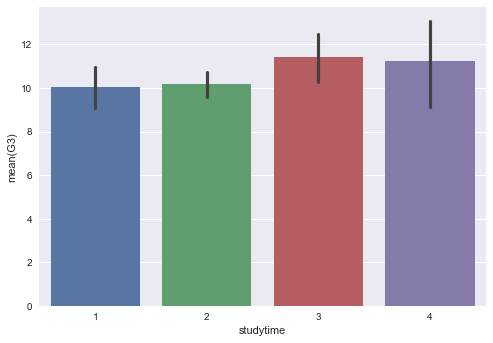

In [34]:
sns.barplot(x='studytime', y='G3', data=df_math)

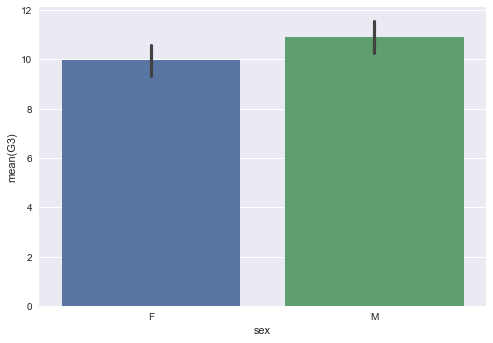

In [35]:
sns.barplot(x='sex', y='G3', data=df_math)

In [36]:
selected_X = ['sex', 'studytime', 'goout', 'mjob']

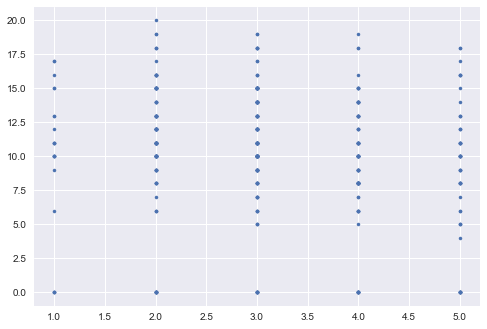

In [37]:
plt.plot(df_math['goout'], df_math['G3'], '.')

## 2)

###  I'll get numerical absences, age, famrel

In [38]:
import sklearn

In [39]:
scaler = sklearn.preprocessing.StandardScaler()

In [40]:
df_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,10


In [41]:
numerical_cols = ['absences', 'age', 'famrel']

In [42]:
transformed_numerical = scaler.fit_transform(df_math[numerical_cols])

In [43]:
transformed_numerical

array([[ 0.03642446,  1.02304645,  0.06219406],
       [-0.21379577,  0.23837976,  1.17886012],
       [ 0.53686493, -1.33095364,  0.06219406],
       ..., 
       [-0.33890588,  3.37704655,  1.17886012],
       [-0.71423623,  1.02304645,  0.06219406],
       [-0.08868565,  1.80771315, -1.054472  ]])

In [44]:
scaled_df = pd.DataFrame(transformed_numerical, columns=numerical_cols)

In [45]:
scaled_df.shape

(395, 3)

In [46]:
df_math['G3'].shape

(395,)

In [47]:
concated = pd.concat([scaled_df, df_math['G3']], axis=1)

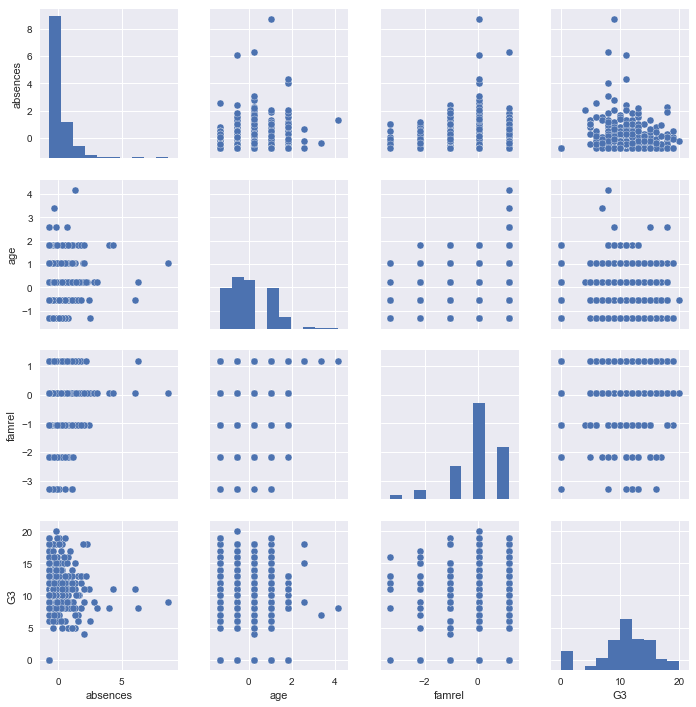

In [48]:
sns.pairplot(concated)

In [49]:
df_math.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,20.000000


### Unusual data

In [50]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numerical_cols = df_math.select_dtypes(include=numerics).columns

In [51]:
numerical_cols

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G3'],
      dtype='object')

In [52]:
numerical_df = df_math[numerical_cols]

age
Medu
Fedu
traveltime
studytime
failures
famrel


/Users/costefan/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


freetime
goout
Dalc
Walc
health
absences


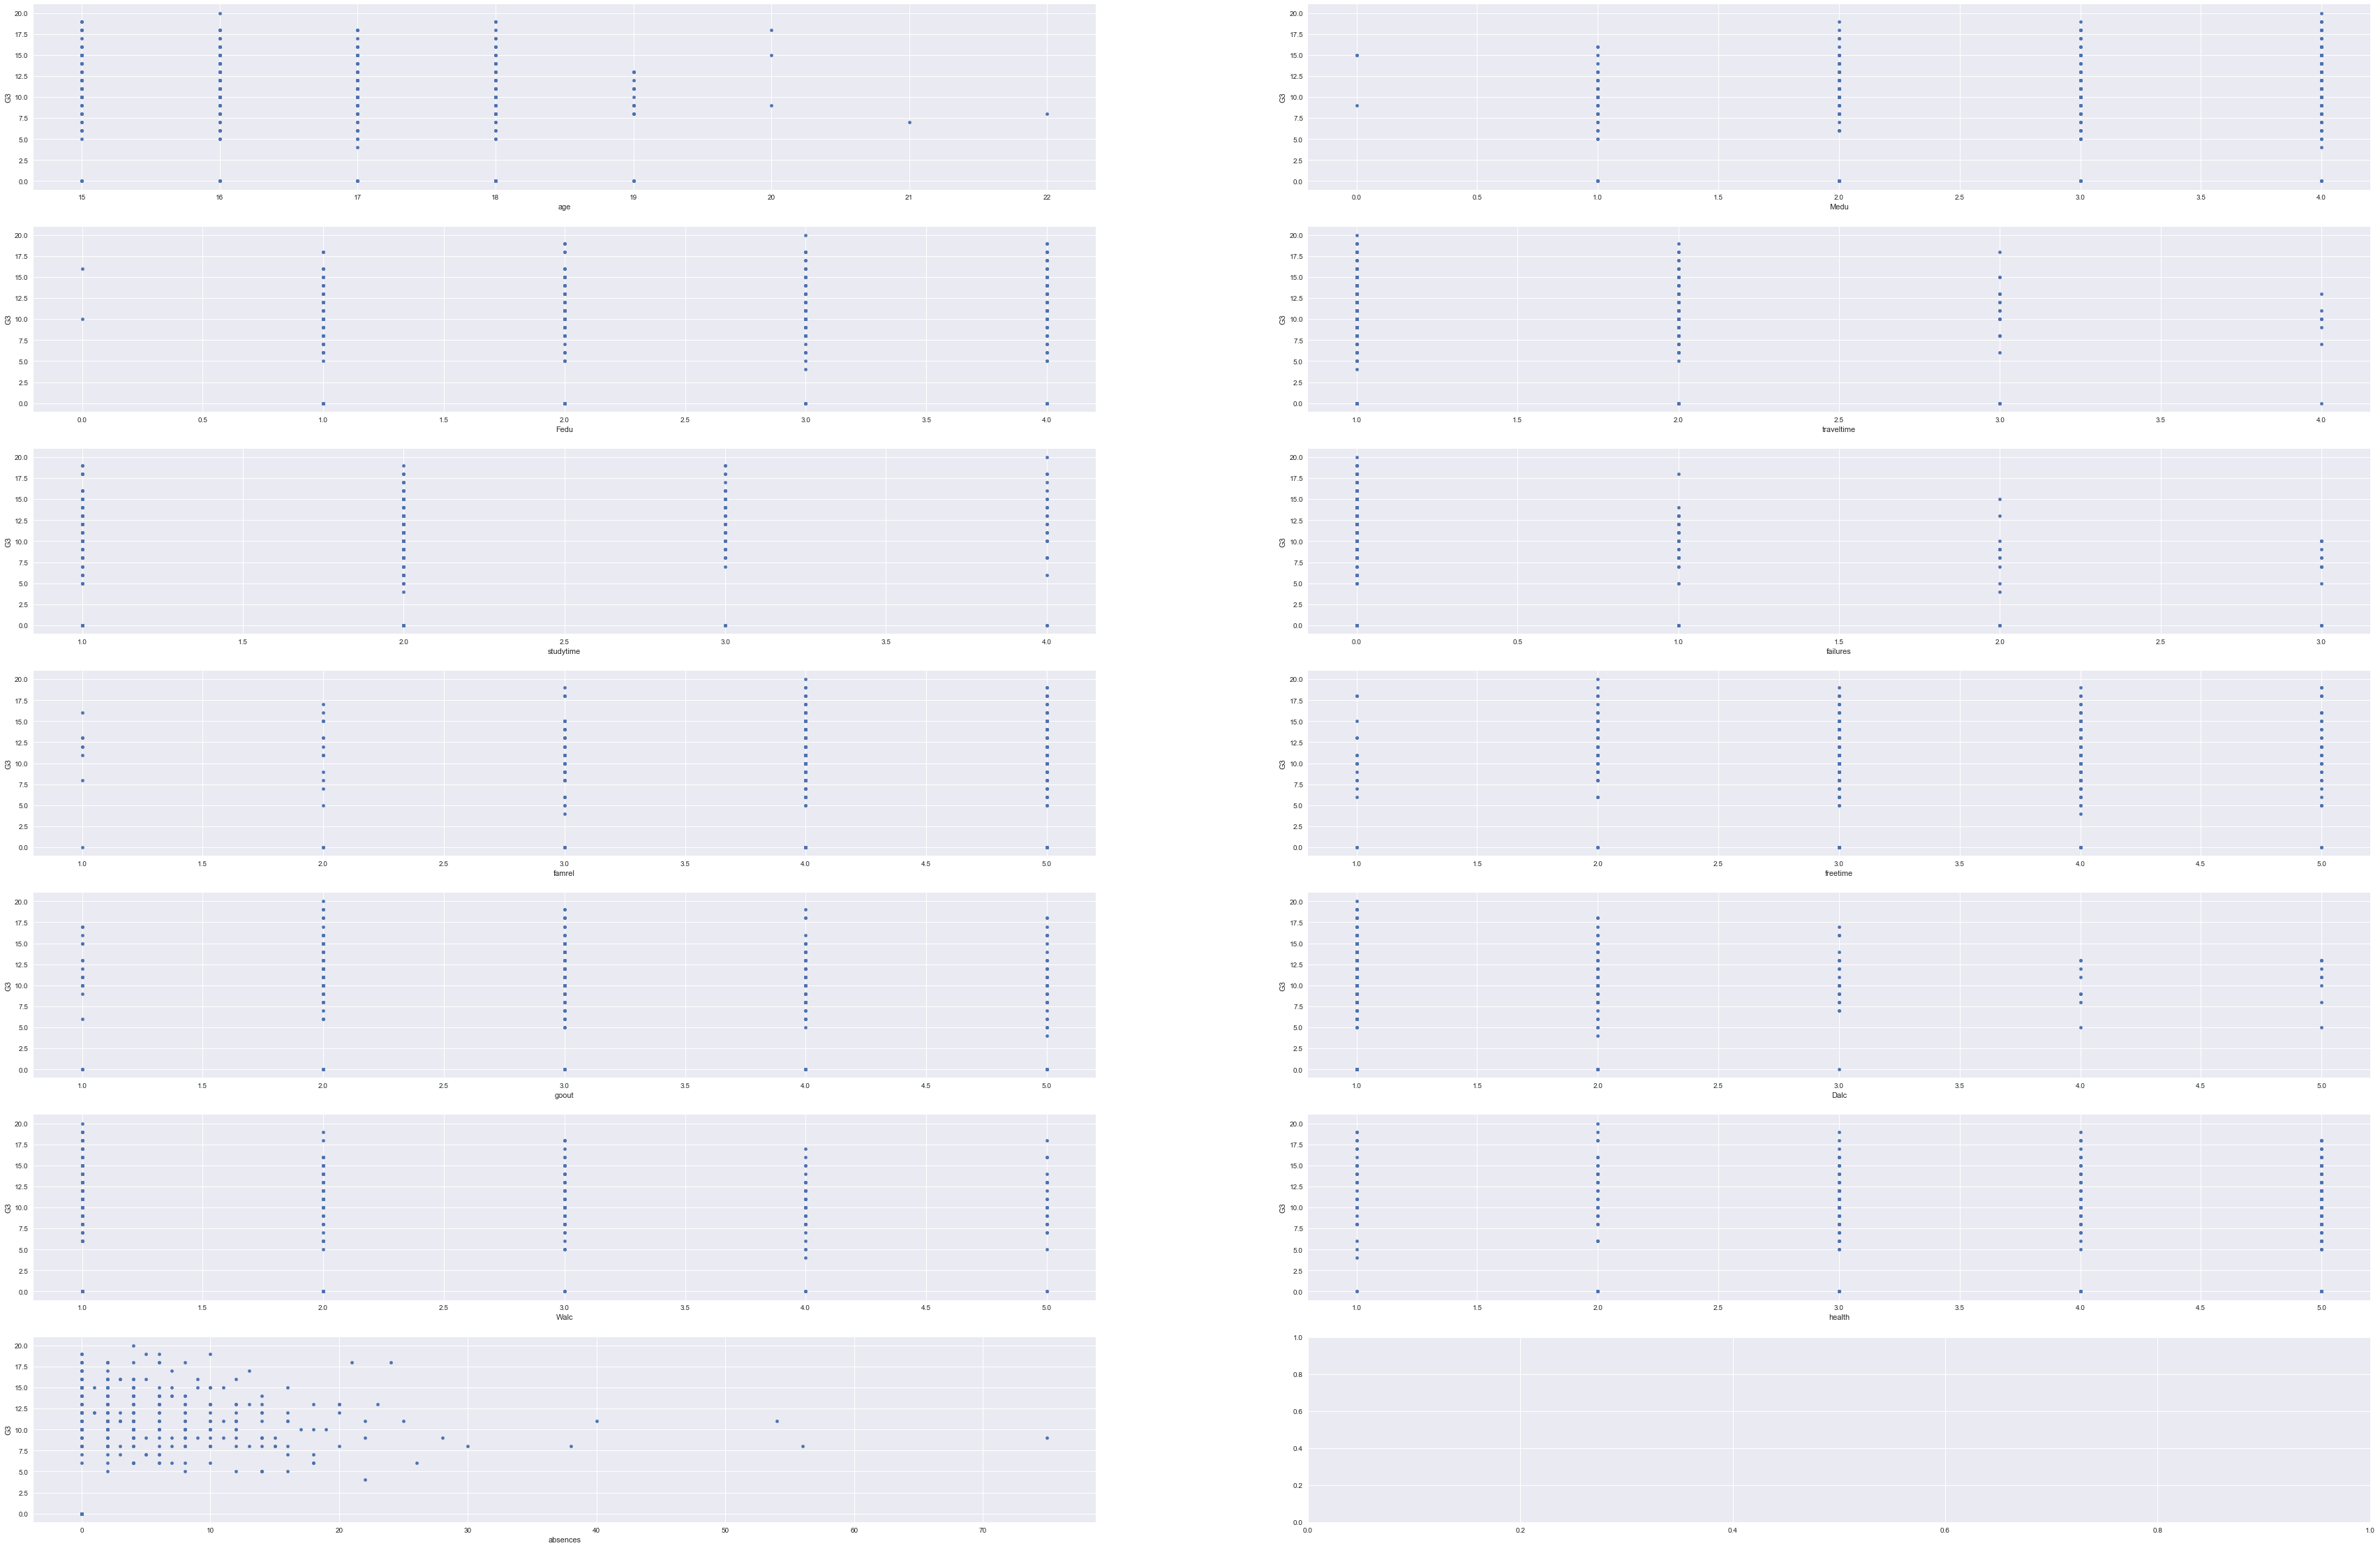

In [53]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(60, 40))
for idx, feature in enumerate(numerical_df.columns[:-1]):
    print(feature)
    numerical_df.plot(feature, 'G3', subplots=True, ax=axes[idx / 2, idx % 2], kind='scatter')

### Check for non linearity

In [54]:
import statsmodels.formula.api as smf

### Let's look closer on absences

In [55]:
X = df_math['absences'], df_math['G3']

In [56]:
f = 'G3 ~ absences'

In [57]:
lm = smf.ols(f, data=df_math).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.4615
Date:                Mon, 08 Jan 2018   Prob (F-statistic):              0.497
Time:                        22:11:51   Log-Likelihood:                -1160.9
No. Observations:                 395   AIC:                             2326.
Df Residuals:                     393   BIC:                             2334.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     10.3033      0.283     36.347      0.000         9.746    10.861
absences       0.0196      0.029      0.679      0.497        -0.037     0.076
==============================================================================
Omnibus:                       28.954   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.235
Skew:                          -0.694   Prob(JB):                     6.07e-08
Kurtosis:                       3.303   Cond. No.                         12.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

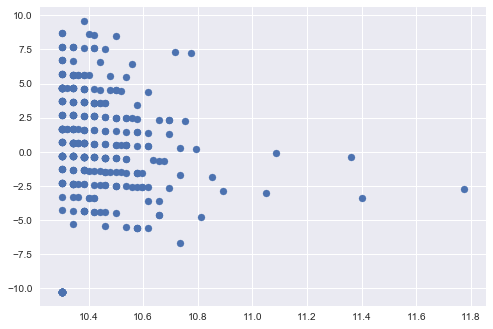

In [58]:
plt.scatter(lm.predict(), lm.resid)

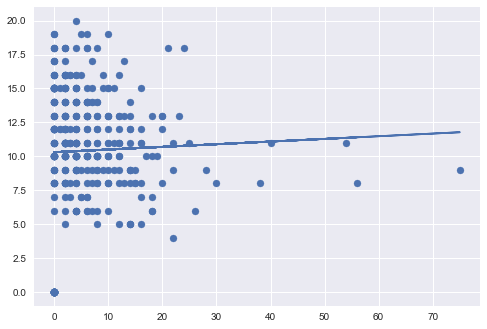

In [59]:
def make_scatter_lm(df, feature: str, y: str, lm):
    plt.scatter(x=df.get(feature), y=df.get(y))
    plt.plot(df.get(feature), lm.params[0] + lm.params[1] * df.get(feature), '-')

make_scatter_lm(df_math, feature='absences', y='G3', lm=lm)
plt.show()

### Now will try to add lowess to the model

In [60]:
from statsmodels.nonparametric.smoothers_lowess import lowess
lowess_df = pd.DataFrame(lowess(endog = df_math.G3, exog = df_math.absences, frac = 0.5), columns = ["absences", "G3"])
lowess_df.head()

,absences,G3
0,0.0,10.241268
1,0.0,10.241268
2,0.0,10.241268
3,0.0,10.241268
4,0.0,10.241268


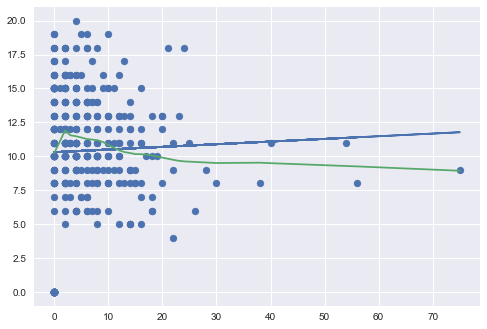

In [61]:
df_math_wth_zeros = df_math[df_math['absences'] != 0]
make_scatter_lm(df_math, feature='absences', y='G3', lm=lm)
plt.plot(lowess_df.absences, lowess_df.G3)

###  I'd say that this line is not much better than linear approach, but definitely better

### Let's try to do some transformations

In [62]:
log_df = df_math.copy()
log_df.shape
log_df = log_df[log_df['absences'] != 0]
log_df['log_abs'] = np.log(log_df['absences'])

In [63]:
log_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3,log_abs
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,4,3,4,1,1,3,6,6,1.791759
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,5,3,3,1,1,3,4,6,1.386294
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,4,3,2,2,3,3,10,10,2.302585
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,3,2,2,1,1,5,2,15,0.693147
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,4,3,2,1,2,5,4,10,1.386294


In [64]:
lm2 = smf.ols('G3 ~ log_abs', data=log_df)

In [65]:
lm2 = lm2.fit()

In [66]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     10.99
Date:                Mon, 08 Jan 2018   Prob (F-statistic):            0.00104
Time:                        22:11:51   Log-Likelihood:                -717.54
No. Observations:                 280   AIC:                             1439.
Df Residuals:                     278   BIC:                             1446.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     12.5333      0.437     28.666      0.000        11.673    13.394
log_abs       -0.7574      0.228     -3.315      0.001        -1.207    -0.308
==============================================================================
Omnibus:                        4.972   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.083   Jarque-Bera (JB):                5.088
Skew:                           0.318   Prob(JB):                       0.0786
Kurtosis:                       2.819   Cond. No.                         5.48
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

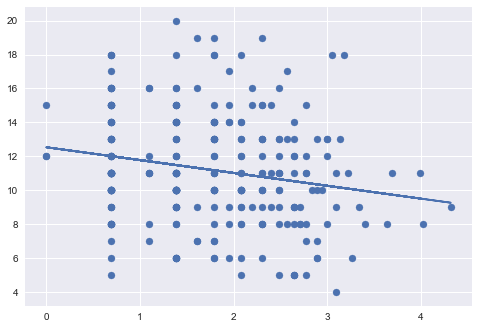

In [67]:
make_scatter_lm(log_df, feature='log_abs', y='G3', lm=lm2)

In [68]:
n_df = df_math.copy()
n_df = n_df[n_df['absences'] != 0]
n_df['n_abs'] = 1 / (n_df['absences'])

In [69]:
lm3 = smf.ols('G3 ~ n_abs', data=n_df).fit()

In [70]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     8.375
Date:                Mon, 08 Jan 2018   Prob (F-statistic):            0.00411
Time:                        22:11:52   Log-Likelihood:                -718.81
No. Observations:                 280   AIC:                             1442.
Df Residuals:                     278   BIC:                             1449.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     10.4986      0.314     33.408      0.000         9.880    11.117
n_abs          3.0144      1.042      2.894      0.004         0.964     5.065
==============================================================================
Omnibus:                        5.304   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.070   Jarque-Bera (JB):                5.434
Skew:                           0.329   Prob(JB):                       0.0661
Kurtosis:                       2.817   Cond. No.                         5.84
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

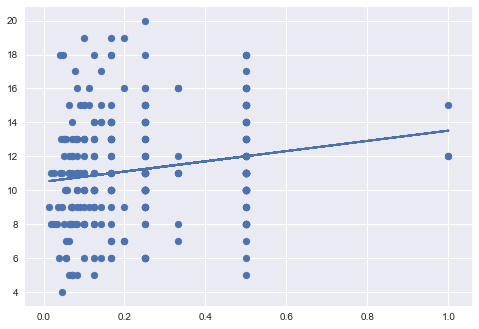

In [71]:
make_scatter_lm(n_df, feature='n_abs', y='G3', lm=lm3)

### 3)

In [72]:
categorical_cols = set(df_math.columns) - set(numerical_cols)
binary_cols = {
    'famsup',
     'guardian',
     'higher',
     'internet',
     'nursery',
     'paid',
     'reason',
     'romantic'
}

In [73]:
f = 'G3 ~ {}'.format(
    ' + '.join(
        [
            'C({})'.format(col) if col in categorical_cols else col 
             for col in df_math.drop('G3', axis=1)
        ]
    )
)

In [74]:
f = f[:-8]

In [75]:
df_math_transformed = df_math[df_math['absences'] != 0]

In [76]:
f += 'np.log(absences)'

In [77]:
lm = smf.ols(f, data=df_math_transformed).fit()

In [78]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.353
Model:                            OLS   Adj. R-squared:                  0.248
Method:                 Least Squares   F-statistic:                     3.358
Date:                Mon, 08 Jan 2018   Prob (F-statistic):           5.26e-09
Time:                        22:11:52   Log-Likelihood:                -662.00
No. Observations:                 280   AIC:                             1404.
Df Residuals:                     240   BIC:                             1549.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
Intercept                  16.3709      3.676      4.453      0.000         9.129    23.613
C(school)[T.MS]            -1.0552      0.661     -1.597      0.112        -2.357     0.246
C(sex)[T.M]                 0.3306      0.402      0.822      0.412        -0.462     1.123
C(address)[T.U]             0.2402      0.458      0.524      0.601        -0.663     1.143
C(famsize)[T.LE3]           0.5877      0.392      1.500      0.135        -0.184     1.359
C(Pstatus)[T.T]             0.8142      0.596      1.366      0.173        -0.360     1.988
C(Mjob)[T.health]           1.0161      0.901      1.128      0.260        -0.758     2.790
C(Mjob)[T.other]           -0.2348      0.590     -0.398      0.691        -1.397     0.928
C(Mjob)[T.services]         0.9309      0.664      1.402      0.162        -0.377     2.239
C(Mjob)[T.teacher]         -0.5215      0.860     -0.606      0.545        -2.216     1.173
C(Fjob)[T.health]          -0.4999      1.158     -0.432      0.666        -2.781     1.781
C(Fjob)[T.other]           -0.8829      0.863     -1.023      0.307        -2.582     0.817
C(Fjob)[T.services]        -0.8850      0.901     -0.982      0.327        -2.661     0.891
C(Fjob)[T.teacher]          1.7358      1.086      1.599      0.111        -0.403     3.875
C(reason)[T.home]           0.2158      0.457      0.472      0.637        -0.685     1.117
C(reason)[T.other]         -0.1470      0.658     -0.223      0.823        -1.442     1.148
C(reason)[T.reputation]    -0.1970      0.471     -0.419      0.676        -1.124     0.730
C(guardian)[T.mother]       0.3664      0.458      0.800      0.424        -0.535     1.268
C(guardian)[T.other]        1.0861      0.818      1.328      0.185        -0.525     2.697
C(schoolsup)[T.yes]        -2.5387      0.522     -4.862      0.000        -3.567    -1.510
C(famsup)[T.yes]           -0.8360      0.387     -2.163      0.032        -1.597    -0.075
C(paid)[T.yes]             -0.5864      0.378     -1.550      0.122        -1.332     0.159
C(activities)[T.yes]        0.0801      0.375      0.214      0.831        -0.658     0.818
C(nursery)[T.yes]          -0.3108      0.445     -0.698      0.486        -1.187     0.566
C(higher)[T.yes]           -0.0234      0.951     -0.025      0.980        -1.896     1.850
C(internet)[T.yes]          0.6404      0.506      1.266      0.207        -0.356     1.637
C(romantic)[T.yes]         -0.1067      0.398     -0.268      0.789        -0.891     0.677
age                        -0.2635      0.177     -1.486      0.139        -0.613     0.086
Medu                        0.3957      0.268      1.478      0.141        -0.132     0.923
Fedu                        0.0294      0.230      0.128      0.898        -0.423     0.482
traveltime                  0.1598      0.275  

### $R^2$, $R^2adj$  =  0.35, 0.25 - the data is not very close to our fitting line 

###  The default behaviour for categorical variables - is to make dummies, and we should check if all dummies for fjob is insignificant <br /> 
##### coef	std err	t	P>|t|	[95.0% Conf. Int.] <br />
C(Fjob)[T.health]	0.3477	1.438	0.242	0.809	-2.480 3.176 <br />
C(Fjob)[T.other]	-0.6197	1.023	-0.606	0.545	-2.632 1.392 <br />
C(Fjob)[T.services]	-0.4658	1.057	-0.441	0.660	-2.544 1.613 <br />
C(Fjob)[T.teacher]	1.3262	1.297	1.023	0.307	-1.224 3.876 <br />

### All dummies in Fjob is insignificant, P values is big, <br /> so changes in this values does not change change the response (mark G3)

### F-test: tests the joint explanatory power of all regressors

In [79]:
lm.f_test('C(Fjob)[T.health] = C(Fjob)[T.other] = C(Fjob)[T.services] = C(Fjob)[T.teacher]')  

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[ 4.14629974]]), p=0.006878956459580493, df_denom=240, df_num=3>

### P value is less than 0.05, so Fjob with all dummies is significant

## 4)

Age

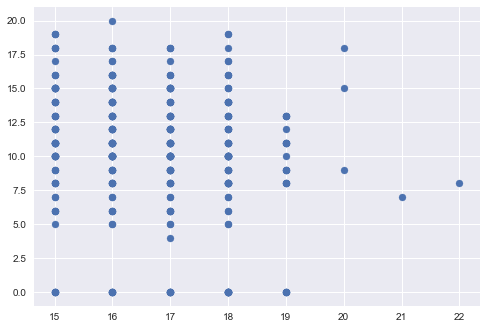

In [80]:
plt.scatter(df_math['age'], df_math['G3'])

the younger you are - the bigger variance in marks, but the younger people has biggest values.

looks like there should be transformation (quadratical?)

goout

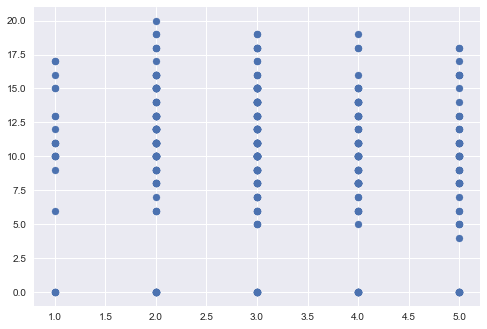

In [81]:
plt.scatter(df_math['goout'], df_math['G3'])

People which are going out too much will not have the best scores, people which regularry(not too much) going out with their friends woll have the best grades, but the variance will be big, <br /> People which is rarely going out with their friends, will not certainly have good grades.

## 5)

### Confidence intervals for absences and famsup

#### absences (log(absences)) ===== (-1.149 -0.172) with coeff -0.6604	

#### famsup =====   (-1.597	-0.075) with coeff -0.8360		

### Economic interpretation of  confidence intervals - they are large, and we cannot conclude smth

(array([  7.,  14.,  39.,  53.,  58.,  56.,  26.,  17.,   7.,   3.]),
 array([-6.23281872, -4.84262579, -3.45243287, -2.06223994, -0.67204702,
         0.71814591,  2.10833883,  3.49853175,  4.88872468,  6.2789176 ,
         7.66911053]),
 <a list of 10 Patch objects>)

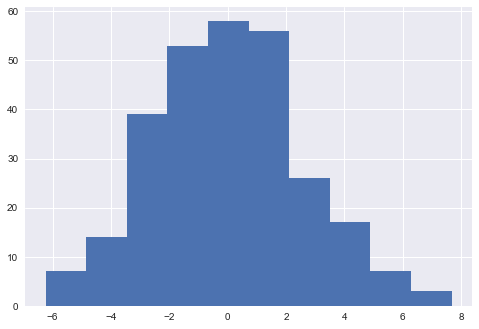

In [82]:
plt.hist(lm.resid)

### Let's draw qqplot

In [83]:
import scipy.stats as scipystats

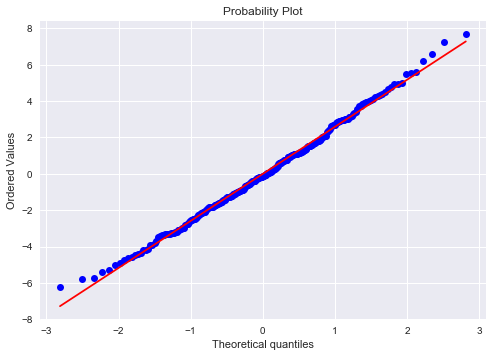

In [84]:
scipystats.probplot(lm.resid, plot=plt)
plt.show()

### Let's normalize data and run tests

In [85]:
normalized_resid = (lm.resid - np.mean(lm.resid)) / np.std(lm.resid)

In [86]:
scipystats.normaltest(normalized_resid)

NormaltestResult(statistic=2.0703087110291598, pvalue=0.35517155400565903)

## 6)

## Stepwize selection

In [87]:
# Python does not have implemented, so 
# http://planspace.org/20150423-forward_selection_with_statsmodels/
def forward_selected(data, response):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate if candidate not in categorical_cols else 'C({})'.format(candidate)]))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return model

In [88]:
dummy_df = pd.get_dummies(log_df, columns=categorical_cols)
dummy_df.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G3',
       'log_abs', 'famsize_GT3', 'famsize_LE3', 'higher_no', 'higher_yes',
       'Pstatus_A', 'Pstatus_T', 'address_R', 'address_U', 'famsup_no',
       'famsup_yes', 'nursery_no', 'nursery_yes', 'romantic_no',
       'romantic_yes', 'internet_no', 'internet_yes', 'sex_F', 'sex_M',
       'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services',
       'Fjob_teacher', 'schoolsup_no', 'schoolsup_yes', 'school_GP',
       'school_MS', 'Mjob_at_home', 'Mjob_health', 'Mjob_other',
       'Mjob_services', 'Mjob_teacher', 'reason_course', 'reason_home',
       'reason_other', 'reason_reputation', 'activities_no', 'activities_yes',
       'guardian_father', 'guardian_mother', 'guardian_other', 'paid_no',
       'paid_yes'],
      dtype='object')

In [89]:
model = forward_selected(log_df, 'G3')

In [90]:
model.model.formula

'G3 ~ failures + schoolsup + Fjob + log_abs + Mjob + goout + health + school + famsup + internet + Medu + paid + studytime + famsize + Pstatus + age + sex + guardian + 1'

In [91]:
model.rsquared_adj

0.28209593209643979

### Method explanation (simple to general)

### All is clear, we are checking $ R^2adj $  in every step adding new feature, and do ols, feature with te biggest R adj_squared will be accepted and added to model. Then with existed model, we are trying to add new, again and again

In [92]:
df = log_df[['failures', 'schoolsup', 'Fjob', 'log_abs', 'Mjob', 'goout', 'health', 'school', 'famsup', 'internet', 'Medu', 'paid', 'studytime', 'famsize', 'Pstatus', 'age', 'sex', 'guardian']]

## 7)

### Outliers detection

In [93]:
influence = model.get_influence()

#### Cooks

In [94]:
cooks, p = influence.cooks_distance

#### Leverage

In [95]:
leverage = pd.Series(influence.hat_matrix_diag, name='leverage')
leverage.describe()

count    280.000000
mean       0.092857
std        0.032432
min        0.033904
25%        0.068635
50%        0.088629
75%        0.111238
max        0.200530
Name: leverage, dtype: float64

In [96]:
df_leverage = pd.concat([df, leverage], axis=1).sort_values(by='leverage', ascending=False).head(20)
highest_leverage_df = df_leverage.dropna().head(20)

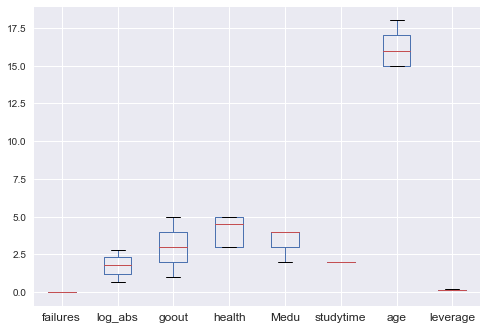

In [97]:
highest_leverage_df.boxplot(figsize=(15, 10))

In [98]:
highest_leverage_df['failures']

175    0.0
181    0.0
37     0.0
79     0.0
2      3.0
226    0.0
275    0.0
0      0.0
57     0.0
276    0.0
29     0.0
68     0.0
261    0.0
102    0.0
142    0.0
41     0.0
Name: failures, dtype: float64

In [99]:
for col in highest_leverage_df[['goout', 'health', 'studytime']]:
    print(col)
    print(highest_leverage_df[col].value_counts())
    print('======================================')

goout
3.0    6
2.0    4
4.0    4
5.0    1
1.0    1
Name: goout, dtype: int64
health
5.0    8
3.0    6
4.0    2
Name: health, dtype: int64
studytime
2.0    12
1.0     2
3.0     2
Name: studytime, dtype: int64


####  What makes them outstanding? All of this students have no failures and were studying from 2 to 5 hours weekly. 

## 8)

### Missed data

In [100]:
from random import randint

def set_nulls():
    log_df['age'].set_value(50, 0)
    log_df['age'].set_value(100, 0)
    log_df['age'].set_value(150, 0)
    
def print_nulls():
    print(log_df[log_df['age'] == 0])

In [101]:
set_nulls()

In [102]:
print_nulls()

    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
50      GP   F    0       U     LE3       T     2     2  services  services   
100     GP   M    0       U     GT3       T     4     4  services  services   

       ...    romantic famrel  freetime  goout  Dalc Walc health absences  G3  \
50     ...          no      4         3      3     2    3      4        2  13   
100    ...          no      4         5      5     5    5      4       14   5   

      log_abs  
50   0.693147  
100  2.639057  

[2 rows x 32 columns]


/Users/costefan/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/ipykernel/__main__.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


### MCAR (Completely at random) and MAR (Missing at random)

#### Mean imputation  - we are adding mean to the missing data, the most naive imputation

In [103]:
from sklearn.preprocessing import Imputer

In [104]:
imputer1 = Imputer(missing_values=0, strategy='mean')
log_df['age'] = imputer1.fit_transform(log_df[['age']])

In [105]:
print_nulls()

Empty DataFrame
Columns: [school, sex, age, address, famsize, Pstatus, Medu, Fedu, Mjob, Fjob, reason, guardian, traveltime, studytime, failures, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic, famrel, freetime, goout, Dalc, Walc, health, absences, G3, log_abs]
Index: []

[0 rows x 32 columns]


#### Hot imputation - we are adding mode to the missing data

In [106]:
set_nulls()

In [107]:
imputer2 = Imputer(missing_values=0, strategy='most_frequent')
log_df['age'] = imputer2.fit_transform(log_df[['age']])

In [108]:
print_nulls()

Empty DataFrame
Columns: [school, sex, age, address, famsize, Pstatus, Medu, Fedu, Mjob, Fjob, reason, guardian, traveltime, studytime, failures, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic, famrel, freetime, goout, Dalc, Walc, health, absences, G3, log_abs]
Index: []

[0 rows x 32 columns]


#### if higher was missing, i will try to drop it, but it depends on count of observations, and count of missing values per dataset size

## 9)

### Bartlett test

In [109]:
residual_per_goout = pd.concat([pd.Series(model.resid, name='resid'), log_df['goout']], axis=1)

In [110]:
grouped_df = residual_per_goout.groupby(residual_per_goout['goout'])

In [111]:
values_resid_per_groups = list(map(list, grouped_df.groups.values()))

In [112]:
from scipy.stats import bartlett

In [113]:
bartlett(*values_resid_per_groups)

BartlettResult(statistic=1.8739570728930741, pvalue=0.7589273434065319)

### FGLS

Python has no implementation

## 10)

## White’s (1980) heteroskedasticity robust standard errors. 

In [115]:
lm.HC0_se

Intercept                  2.954784
C(school)[T.MS]            0.534248
C(sex)[T.M]                0.356955
C(address)[T.U]            0.433764
C(famsize)[T.LE3]          0.365755
C(Pstatus)[T.T]            0.532117
C(Mjob)[T.health]          0.894198
C(Mjob)[T.other]           0.597242
C(Mjob)[T.services]        0.658903
C(Mjob)[T.teacher]         0.806335
C(Fjob)[T.health]          0.968261
C(Fjob)[T.other]           0.831053
C(Fjob)[T.services]        0.831301
C(Fjob)[T.teacher]         1.049871
C(reason)[T.home]          0.375289
C(reason)[T.other]         0.664003
C(reason)[T.reputation]    0.430896
C(guardian)[T.mother]      0.446115
C(guardian)[T.other]       0.700789
C(schoolsup)[T.yes]        0.486373
C(famsup)[T.yes]           0.369810
C(paid)[T.yes]             0.344760
C(activities)[T.yes]       0.346400
C(nursery)[T.yes]          0.371359
C(higher)[T.yes]           0.670073
C(internet)[T.yes]         0.448317
C(romantic)[T.yes]         0.367518
age                        0

####  Bartlett's test is sensitive to normal distribution of residuals, usually, it uses as additional one. White's test is robust, it creates additional regression, and checks it's $R$.

## 11) Summary

### Model is very bad, and I don't think that we can conclude something, except this facts:
* goout is significant
* Mjob is significant